<a href="https://colab.research.google.com/github/thaisgulias/DataAnalytics_student/blob/main/Exercicio_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##preparação

In [ ]:
pip install gcsfs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
#import pandera as pa
import numpy as np
import os
from google.cloud import storage

In [ ]:
import pandas as pd
import os
import numpy as np
from google.cloud import storage

##Cloud

In [ ]:
#CONFIGURANDO DA CHAVE DE SEGURANCA (Enviada com o projeto)

serviceAccount = '/content/compact-epigram-377819-06a43c21ad20.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
#Configurações Google Cloud Storage
client = storage.Client()
bucket = client.get_bucket('aulapandas')
bucket.blob('amsterdam_weekdays.csv')
path = 'gs://aulapandas/brutos/amsterdam_weekdays.csv'

In [ ]:
df = pd.read_csv(path,sep=',')

In [ ]:
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


##pre-analise

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.fillna(0)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


##traducao


In [ ]:
df['room_type'].unique() #identificando as variaveis dentro da coluna room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
df = df.rename(columns={
    'realSum': 'preço total',
    'room_type': 'tipo de quarto',
    'room_shared': 'quarto compartilhado',
    'room_private': 'quarto privativo',
    'person_capacity': 'capacidade de hospedes',
    'host_is_superhost': 'superhost',
    'multi': 'n quartos',
    'biz': 'tipo',
    'cleanliness_rating': 'Classificação de limpeza',
    'guest_satisfaction_overall': 'satisfação',
    'bedrooms': 'número de quartos'
})
#traduzindo nome das colunas 

In [ ]:
df['tipo de quarto'].replace({'Private room': 'privado', 'Entire home/apt': 'hosp_inteiro', 'Shared room': 'compartilhado'}, inplace=True) #traduzindo as variaveis de room_type


In [ ]:
df

,Unnamed: 0,preço total,tipo de quarto,quarto compartilhado,quarto privativo,capacidade de hospedes,superhost,n quartos,tipo,Classificação de limpeza,satisfação,número de quartos,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,privado,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,hosp_inteiro,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,privado,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,privado,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,hosp_inteiro,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [ ]:
df_copia = df.copy() # criando uma cópia do DataFrame original
colunas_para_remover = ['attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
df_copia = df_copia.drop(columns=colunas_para_remover) # removendo as colunas indesejadas


In [ ]:
df_copia

,Unnamed: 0,preço total,tipo de quarto,quarto compartilhado,quarto privativo,capacidade de hospedes,superhost,n quartos,tipo,Classificação de limpeza,satisfação,número de quartos,dist,metro_dist,lng,lat
0,0,194.033698,privado,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.90569,52.41772
1,1,344.245776,privado,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,4.90005,52.37432
2,2,264.101422,privado,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,4.97512,52.36103
3,3,433.529398,privado,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,4.89417,52.37663
4,4,485.552926,privado,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,hosp_inteiro,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,4.85869,52.37677
1099,1099,233.637194,privado,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,4.83611,52.34910
1100,1100,317.062311,privado,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,4.88897,52.37798
1101,1101,1812.855904,hosp_inteiro,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,4.90688,52.35794


##analise das variaveis

In [ ]:
df_copia.corr()

,Unnamed: 0,preço total,quarto compartilhado,quarto privativo,capacidade de hospedes,superhost,n quartos,tipo,Classificação de limpeza,satisfação,número de quartos,dist,metro_dist,lng,lat
Unnamed: 0,1.000000,-0.022390,0.024814,-0.021909,-0.005527,-0.023852,0.007350,-0.015575,-0.022184,-0.031362,-0.022772,-0.005356,0.012942,-0.046654,-0.013785
preço total,-0.022390,1.000000,-0.046853,-0.433549,0.526992,-0.063118,-0.104973,-0.026808,0.022938,0.136025,0.491703,-0.258692,-0.142298,-0.029993,0.093704
quarto compartilhado,0.024814,-0.046853,1.000000,-0.074968,-0.008908,0.006581,0.030710,-0.026678,-0.027327,-0.018581,-0.028276,0.039411,0.017080,-0.005203,0.002321
quarto privativo,-0.021909,-0.433549,-0.074968,1.000000,-0.376941,0.172563,0.238326,0.083153,0.031909,-0.133384,-0.382664,0.101955,0.047888,0.075347,-0.046700
capacidade de hospedes,-0.005527,0.526992,-0.008908,-0.376941,1.000000,-0.091513,-0.139980,0.079923,-0.065680,0.035399,0.660776,-0.046410,-0.003328,-0.008643,0.074367
superhost,-0.023852,-0.063118,0.006581,0.172563,-0.091513,1.000000,0.096795,-0.138505,0.314499,0.299440,-0.062919,0.017490,0.040076,-0.056270,0.016724
n quartos,0.007350,-0.104973,0.030710,0.238326,-0.139980,0.096795,1.000000,-0.240799,0.012552,-0.051060,-0.106612,0.007800,-0.028255,-0.027295,-0.020794
tipo,-0.015575,-0.026808,-0.026678,0.083153,0.079923,-0.138505,-0.240799,1.000000,-0.059120,-0.119484,-0.038099,-0.044655,-0.043235,0.074179,0.049952
Classificação de limpeza,-0.022184,0.022938,-0.027327,0.031909,-0.065680,0.314499,0.012552,-0.059120,1.000000,0.648809,-0.015326,-0.021712,0.019532,-0.030684,0.026053
satisfação,-0.031362,0.136025,-0.018581,-0.133384,0.035399,0.299440,-0.051060,-0.119484,0.648809,1.000000,0.104254,-0.059805,0.050810,-0.052624,0.090223


In [ ]:
df_copia.describe() #estatisticas dentro de cada coluna ou acessar direto a coluna [nome].describe()

,Unnamed: 0,preço total,capacidade de hospedes,n quartos,tipo,Classificação de limpeza,satisfação,número de quartos,dist,metro_dist,lng,lat
count,1103.000000,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,551.000000,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,4.891158,52.364858
std,318.552978,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,0.038882,0.019467
min,0.000000,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,4.775500,52.291100
25%,275.500000,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,4.871000,52.354580
50%,551.000000,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,4.890010,52.365590
75%,826.500000,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,4.907315,52.375260
max,1102.000000,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,5.010770,52.423480


##filtro

In [ ]:
filtro = (df_copia['preço total'] > 100) & (df_copia['satisfação'] >= 70)
df_filtrado = df_copia.loc[filtro, ['preço total', 'satisfação']]


In [ ]:
df_filtrado

,preço total,satisfação
0,194.033698,93.0
1,344.245776,85.0
2,264.101422,87.0
3,433.529398,90.0
4,485.552926,98.0
...,...,...
1098,2486.115342,100.0
1099,233.637194,90.0
1100,317.062311,92.0
1101,1812.855904,84.0


##mapplot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Selecionando as linhas do DataFrame que atendem ao filtro
df_filtrado = df_copia.loc[filtro, ['preço total', 'satisfação']]


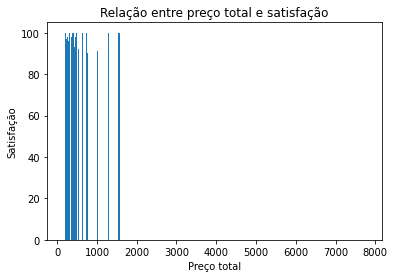

In [ ]:
# Criando o gráfico de linha
plt.bar(df_filtrado['preço total'], df_filtrado['satisfação'])
plt.xlabel('Preço total')
plt.ylabel('Satisfação')
plt.title('Relação entre preço total e satisfação')
plt.show()